## IMPORTS

In [1]:
from Inference import BBVI 
import torch
import matplotlib.pyplot as plt

## EXAMPLE

In [2]:
xpName = 'XP2_nLayers_nNeurons_Grid_deterministic'

### Set the Device

In [3]:
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')

### Load the data

In [4]:
data = torch.load('data/foong_data.pt')
x_data = data[0].to(device)
y_data = data[1].to(device)
y_data = y_data.unsqueeze(-1)

### Parameters

In [5]:
optimizer = torch.optim.Adam
optimizer_params = {'lr': 0.1}

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau
scheduler_params = {'patience': 3, 'factor': 0.8}

### Loop

In [9]:
nbLoops = 10

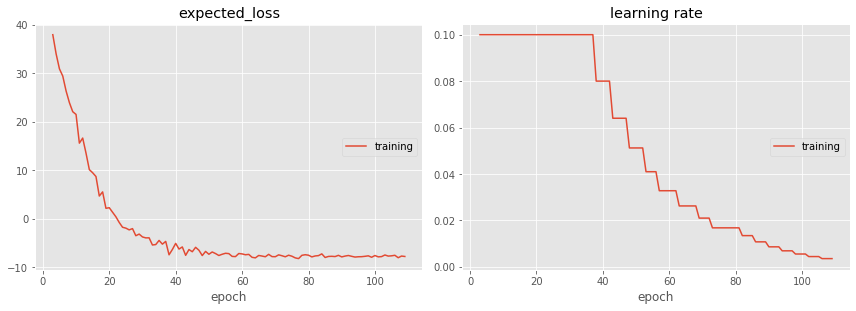

expected_loss:
training   (min:   -8.267, max:  535.080, cur:   -7.827)

learning rate:
training   (min:    0.004, max:    0.100, cur:    0.004)


KeyboardInterrupt: 

In [11]:
for i in [5, 20, 50, 100]:
    for j in [2,3]:
        seed=1
        for k in range(1, nbLoops+1):
            networkName = 'EXP2_' + str(j)+ 'Layers_' + str(i) + 'Neurons_(' + str(k) +')'
            Net = BBVI.VariationalNetwork(input_size=1, output_size=1, layer_width=i, nb_layers=j, device=device)
            Net.make_deterministic_rhos()
            Net.requires_grad_rhos(False)
            voptimizer = BBVI.VariationalOptimizer(model=Net, sigma_noise=0.1, optimizer=optimizer, optimizer_params=optimizer_params, scheduler=scheduler, scheduler_params=scheduler_params)
            Net = voptimizer.run((x_data,y_data), n_epoch=int(250+2*i), n_iter=250, seed=seed, n_ELBO_samples=1, plot=True)
            seed = seed+1
            torch.save(Net, 'Saved/EXP2/' + networkName)